# NYC Taxi Trip Project

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf
https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
cwd = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Image

[Text(0, -200.0, ''),
 Text(0, 0.0, ''),
 Text(0, 200.0, ''),
 Text(0, 400.0, ''),
 Text(0, 600.0, ''),
 Text(0, 800.0, ''),
 Text(0, 1000.0, '')]

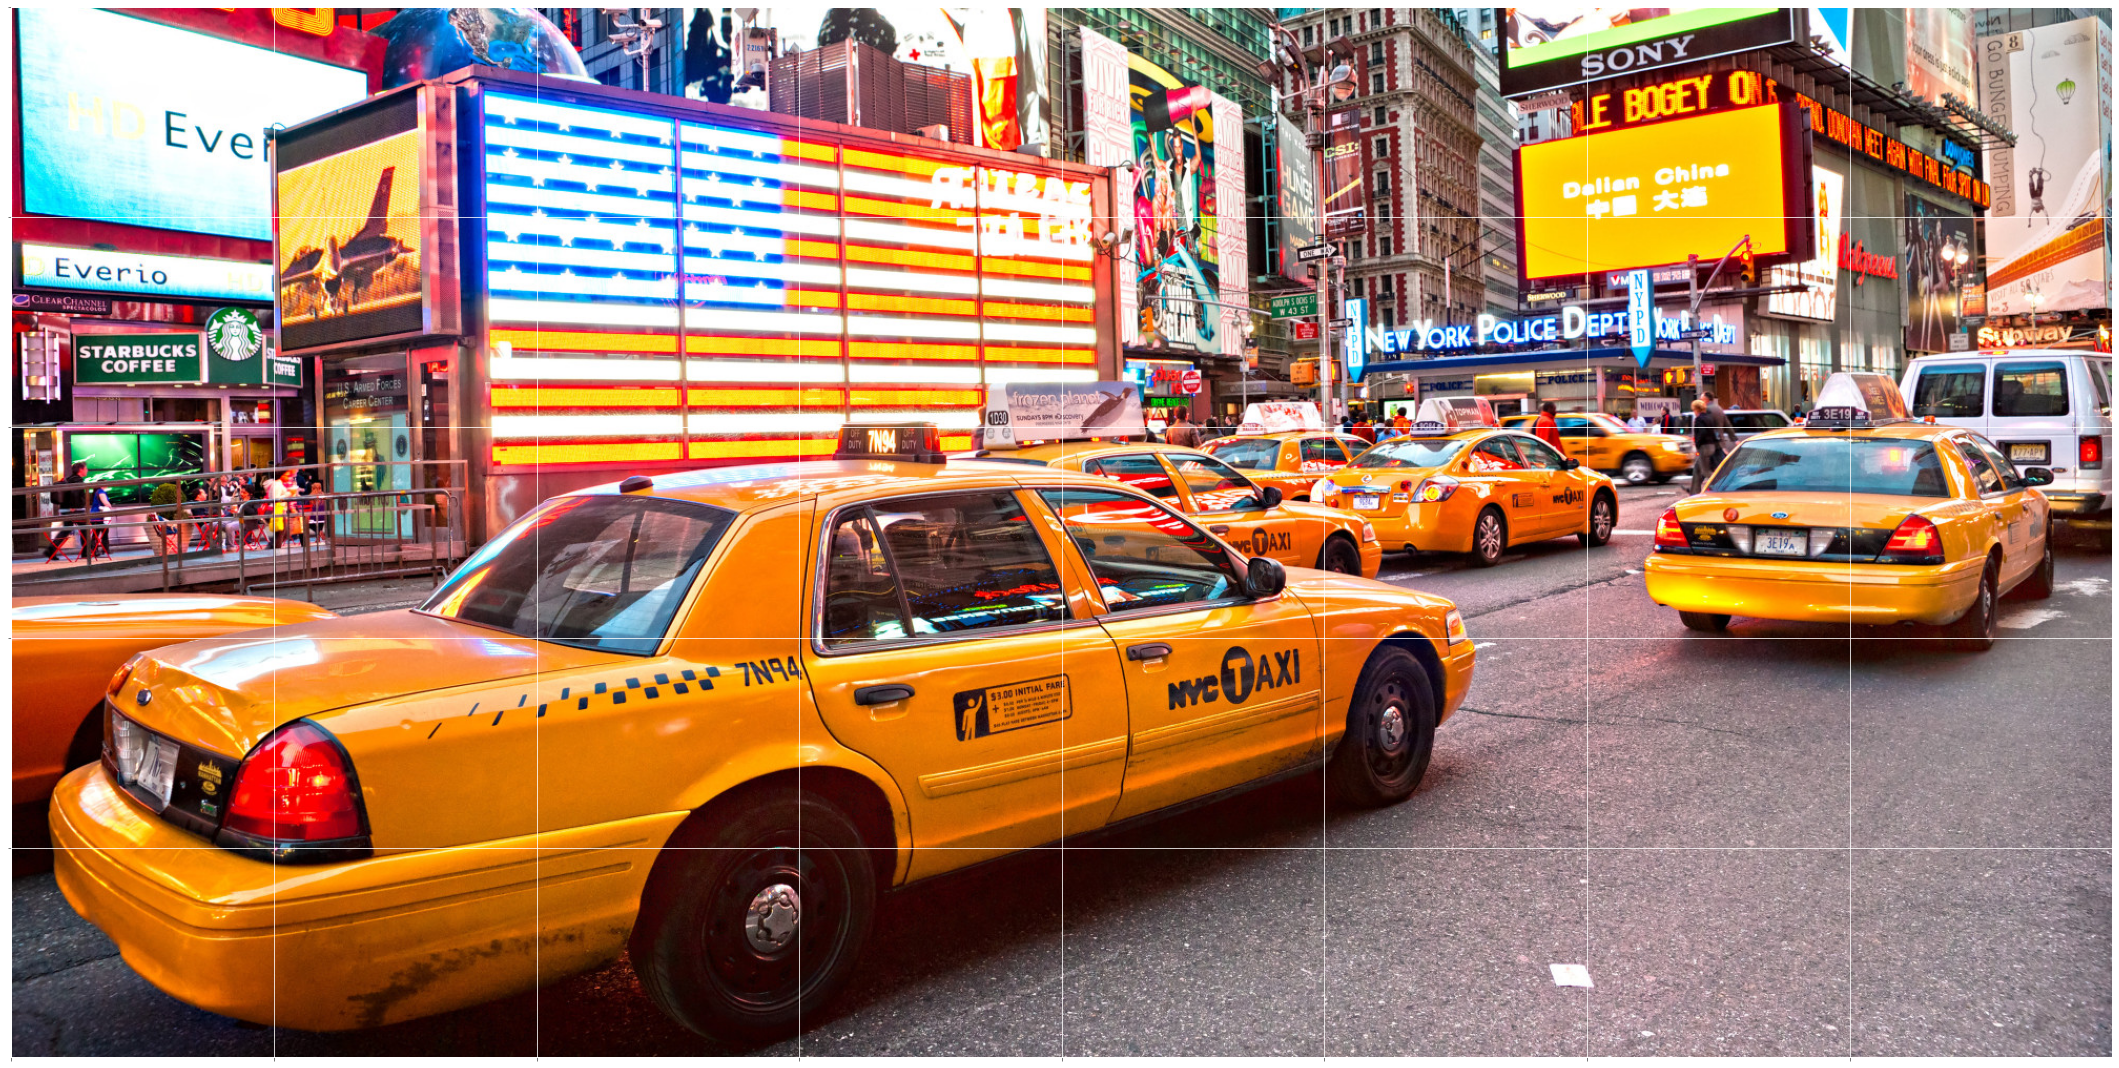

In [3]:
image_path = os.path.join(cwd, 'images', 'NYC Taxi Image.jpg')
image = plt.imread(image_path)

fig, ax = plt.subplots(figsize=(30, 15))
ax.imshow(image)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

# Import Datasets

In [4]:
jan = os.path.join(cwd, 'datasets', 'TLC Trip Record Data', 'yellow_tripdata_2022-01.parquet')            # january dataframe
feb = os.path.join(cwd, 'datasets', 'TLC Trip Record Data', 'yellow_tripdata_2022-02.parquet')            # febuary dataframe
mar = os.path.join(cwd, 'datasets', 'TLC Trip Record Data', 'yellow_tripdata_2022-03.parquet')            # march dataframe
apr = os.path.join(cwd, 'datasets', 'TLC Trip Record Data', 'yellow_tripdata_2022-04.parquet')            # april dataframe

# View Dataframes

In [5]:
jan_df = pd.read_parquet(jan)
jan_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
2463926         2  2022-01-31 23:36:53   2022-01-31 23:42:51              NaN   
2463927         2  2022-01-31 23:44:22   2022-01-31 23:55:01              NaN   
2463928         2  2022-01-31 23:39:00   2022-01-31 23:50:00              NaN   
2463929         2  2022-01-31 23:36:42   2022-01-31 23:48:45              NaN   
2463930         2  2022-01-31 23:46:00   2022-02-01 00:13:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.80         1.0                  N           142   
1                 2.10         1.0                  N           236   
2                 0.97         1.0                  N           166   
3                 1.09         1.0                  N           114   
4                 4.30         1.0                  N            68   
...                ...         ...                ...           ...   
2463926           1.32         NaN               None            90   
2463927           4.19         NaN               None           107   
2463928           2.10         NaN               None           113   
2463929           2.92         NaN               None           148   
2463930           8.94         NaN               None           186   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 236             1        14.50    3.0      0.5        3.65   
1                  42             1         8.00    0.5      0.5        4.00   
2                 166             1         7.50    0.5      0.5        1.76   
3                  68             2         8.00    0.5      0.5        0.00   
4                 163             1        23.50    0.5      0.5        3.00   
...               ...           ...          ...    ...      ...         ...   
2463926           170             0         8.00    0.0      0.5        2.39   
2463927            75             0        16.80    0.0      0.5        4.35   
2463928           246             0        11.22    0.0      0.5        2.00   
2463929           164             0        12.40    0.0      0.5        0.00   
2463930           181             0        25.48    0.0      0.5        6.28   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         21.95   
1                 0.0                    0.3         13.30   
2                 0.0                    0.3         10.56   
3                 0.0                    0.3         11.80   
4                 0.0                    0.3         30.30   
...               ...                    ...           ...   
2463926           0.0                    0.3         13.69   
2463927           0.0                    0.3         24.45   
2463928           0.0                    0.3         16.52   
2463929           0.0                    0.3         15.70   
2463930           0.0                    0.3         35.06   

         congestion_surcharge  airport_fee  
0                         2.5          0.0  
1                         0.0          0.0  
2                         0.0          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
2463926                   NaN          NaN  
2463927                   NaN          NaN  
2463928                   NaN          NaN  
2463929                   N

In [6]:
feb_df = pd.read_parquet(feb)
feb_df 

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-02-01 00:06:58   2022-02-01 00:19:24              1.0   
1               1  2022-02-01 00:38:22   2022-02-01 00:55:55              1.0   
2               1  2022-02-01 00:03:20   2022-02-01 00:26:59              1.0   
3               2  2022-02-01 00:08:00   2022-02-01 00:28:05              1.0   
4               2  2022-02-01 00:06:48   2022-02-01 00:33:07              1.0   
...           ...                  ...                   ...              ...   
2979426         2  2022-02-28 23:50:00   2022-03-01 00:06:00              NaN   
2979427         2  2022-02-28 23:06:57   2022-02-28 23:19:12              NaN   
2979428         2  2022-02-28 23:48:13   2022-03-01 00:03:33              NaN   
2979429         2  2022-02-28 23:56:41   2022-03-01 00:04:57              NaN   
2979430         2  2022-02-28 23:04:00   2022-02-28 23:10:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 5.40         1.0                  N           138   
1                 6.40         1.0                  N           138   
2                12.50         1.0                  N           138   
3                 9.88         1.0                  N           239   
4                12.16         1.0                  N           138   
...                ...         ...                ...           ...   
2979426           3.40         NaN               None           163   
2979427           3.48         NaN               None           141   
2979428           3.05         NaN               None           161   
2979429           2.62         NaN               None           141   
2979430           1.41         NaN               None           237   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 252             1        17.00   1.75      0.5        3.90   
1                  41             2        21.00   1.75      0.5        0.00   
2                 200             2        35.50   1.75      0.5        0.00   
3                 200             2        28.00   0.50      0.5        0.00   
4                 125             1        35.50   0.50      0.5        8.11   
...               ...           ...          ...    ...      ...         ...   
2979426           193             0        14.37   0.00      0.5        0.00   
2979427             4             0        14.51   0.00      0.5        2.00   
2979428           151             0        14.38   0.00      0.5        3.81   
2979429           226             0        12.53   0.00      0.5        1.71   
2979430           142             0         8.80   0.00      0.5        2.57   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    0.3         23.45   
1                6.55                    0.3         30.10   
2                6.55                    0.3         44.60   
3                3.00                    0.3         34.80   
4                0.00                    0.3         48.66   
...               ...                    ...           ...   
2979426          0.00                    0.3         17.67   
2979427          0.00                    0.3         19.81   
2979428          0.00                    0.3         21.49   
2979429          0.00                    0.3         17.54   
2979430          0.00                    0.3         14.67   

         congestion_surcharge  airport_fee  
0                         0.0         1.25  
1                         0.0         1.25  
2                         0.0         1.25  
3                         2.5         0.00  
4                         2.5         1.25  
...                       ...          ...  
2979426                   NaN          NaN  
2979427                   NaN          NaN  
2979428                   NaN          NaN  
2979429                   N

In [7]:
mar_df = pd.read_parquet(mar)
mar_df 

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-03-01 00:13:08   2022-03-01 00:24:35              1.0   
1               1  2022-03-01 00:47:52   2022-03-01 01:00:08              1.0   
2               2  2022-03-01 00:02:46   2022-03-01 00:46:43              1.0   
3               2  2022-03-01 00:52:43   2022-03-01 01:03:40              2.0   
4               2  2022-03-01 00:15:35   2022-03-01 00:34:13              1.0   
...           ...                  ...                   ...              ...   
3627877         2  2022-03-31 23:45:00   2022-04-01 00:01:00              NaN   
3627878         2  2022-03-31 23:59:39   2022-04-01 00:06:09              NaN   
3627879         2  2022-03-31 23:50:00   2022-04-01 00:08:00              NaN   
3627880         2  2022-03-31 23:25:56   2022-03-31 23:32:37              NaN   
3627881         2  2022-03-31 23:08:00   2022-03-31 23:17:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 2.40         1.0                  N            90   
1                 2.20         1.0                  N           148   
2                19.78         2.0                  N           132   
3                 2.94         1.0                  N           211   
4                 8.57         1.0                  N           138   
...                ...         ...                ...           ...   
3627877           3.57         NaN               None            48   
3627878           2.04         NaN               None            48   
3627879           0.59         NaN               None            48   
3627880           1.26         NaN               None           158   
3627881           1.66         NaN               None           112   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 209             2        10.00    3.0      0.5        0.00   
1                 234             2        10.50    3.0      0.5        0.00   
2                 249             1        52.00    0.0      0.5       11.06   
3                  66             1        11.00    0.5      0.5        4.44   
4                 197             1        25.00    0.5      0.5        5.51   
...               ...           ...          ...    ...      ...         ...   
3627877           262             0        18.33    0.0      0.5        1.00   
3627878           238             0         9.75    0.0      0.5        2.00   
3627879             4             0        17.33    0.0      0.5        2.23   
3627880            68             0         8.80    0.0      0.5        2.57   
3627881           256             0         8.80    0.0      0.5        1.82   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         13.80   
1                 0.0                    0.3         14.30   
2                 0.0                    0.3         67.61   
3                 0.0                    0.3         19.24   
4                 0.0                    0.3         33.06   
...               ...                    ...           ...   
3627877           0.0                    0.3         22.63   
3627878           0.0                    0.3         15.05   
3627879           0.0                    0.3         22.86   
3627880           0.0                    0.3         14.67   
3627881           0.0                    0.3         11.42   

         congestion_surcharge  airport_fee  
0                         2.5         0.00  
1                         2.5         0.00  
2                         2.5         1.25  
3                         2.5         0.00  
4                         0.0         1.25  
...                       ...          ...  
3627877                   NaN          NaN  
3627878                   NaN          NaN  
3627879                   NaN          NaN  
3627880                   N

In [8]:
april_df = pd.read_parquet(mar)
april_df 

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-03-01 00:13:08   2022-03-01 00:24:35              1.0   
1               1  2022-03-01 00:47:52   2022-03-01 01:00:08              1.0   
2               2  2022-03-01 00:02:46   2022-03-01 00:46:43              1.0   
3               2  2022-03-01 00:52:43   2022-03-01 01:03:40              2.0   
4               2  2022-03-01 00:15:35   2022-03-01 00:34:13              1.0   
...           ...                  ...                   ...              ...   
3627877         2  2022-03-31 23:45:00   2022-04-01 00:01:00              NaN   
3627878         2  2022-03-31 23:59:39   2022-04-01 00:06:09              NaN   
3627879         2  2022-03-31 23:50:00   2022-04-01 00:08:00              NaN   
3627880         2  2022-03-31 23:25:56   2022-03-31 23:32:37              NaN   
3627881         2  2022-03-31 23:08:00   2022-03-31 23:17:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 2.40         1.0                  N            90   
1                 2.20         1.0                  N           148   
2                19.78         2.0                  N           132   
3                 2.94         1.0                  N           211   
4                 8.57         1.0                  N           138   
...                ...         ...                ...           ...   
3627877           3.57         NaN               None            48   
3627878           2.04         NaN               None            48   
3627879           0.59         NaN               None            48   
3627880           1.26         NaN               None           158   
3627881           1.66         NaN               None           112   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 209             2        10.00    3.0      0.5        0.00   
1                 234             2        10.50    3.0      0.5        0.00   
2                 249             1        52.00    0.0      0.5       11.06   
3                  66             1        11.00    0.5      0.5        4.44   
4                 197             1        25.00    0.5      0.5        5.51   
...               ...           ...          ...    ...      ...         ...   
3627877           262             0        18.33    0.0      0.5        1.00   
3627878           238             0         9.75    0.0      0.5        2.00   
3627879             4             0        17.33    0.0      0.5        2.23   
3627880            68             0         8.80    0.0      0.5        2.57   
3627881           256             0         8.80    0.0      0.5        1.82   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         13.80   
1                 0.0                    0.3         14.30   
2                 0.0                    0.3         67.61   
3                 0.0                    0.3         19.24   
4                 0.0                    0.3         33.06   
...               ...                    ...           ...   
3627877           0.0                    0.3         22.63   
3627878           0.0                    0.3         15.05   
3627879           0.0                    0.3         22.86   
3627880           0.0                    0.3         14.67   
3627881           0.0                    0.3         11.42   

         congestion_surcharge  airport_fee  
0                         2.5         0.00  
1                         2.5         0.00  
2                         2.5         1.25  
3                         2.5         0.00  
4                         0.0         1.25  
...                       ...          ...  
3627877                   NaN          NaN  
3627878                   NaN          NaN  
3627879                   NaN          NaN  
3627880                   N

# Append Dataframes

In [9]:
merged_df = jan_df.append(feb_df).append(mar_df).append(april_df)                 # append january 1st - march 31st dataframes
merged_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
3627877         2  2022-03-31 23:45:00   2022-04-01 00:01:00              NaN   
3627878         2  2022-03-31 23:59:39   2022-04-01 00:06:09              NaN   
3627879         2  2022-03-31 23:50:00   2022-04-01 00:08:00              NaN   
3627880         2  2022-03-31 23:25:56   2022-03-31 23:32:37              NaN   
3627881         2  2022-03-31 23:08:00   2022-03-31 23:17:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.80         1.0                  N           142   
1                 2.10         1.0                  N           236   
2                 0.97         1.0                  N           166   
3                 1.09         1.0                  N           114   
4                 4.30         1.0                  N            68   
...                ...         ...                ...           ...   
3627877           3.57         NaN               None            48   
3627878           2.04         NaN               None            48   
3627879           0.59         NaN               None            48   
3627880           1.26         NaN               None           158   
3627881           1.66         NaN               None           112   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 236             1        14.50    3.0      0.5        3.65   
1                  42             1         8.00    0.5      0.5        4.00   
2                 166             1         7.50    0.5      0.5        1.76   
3                  68             2         8.00    0.5      0.5        0.00   
4                 163             1        23.50    0.5      0.5        3.00   
...               ...           ...          ...    ...      ...         ...   
3627877           262             0        18.33    0.0      0.5        1.00   
3627878           238             0         9.75    0.0      0.5        2.00   
3627879             4             0        17.33    0.0      0.5        2.23   
3627880            68             0         8.80    0.0      0.5        2.57   
3627881           256             0         8.80    0.0      0.5        1.82   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         21.95   
1                 0.0                    0.3         13.30   
2                 0.0                    0.3         10.56   
3                 0.0                    0.3         11.80   
4                 0.0                    0.3         30.30   
...               ...                    ...           ...   
3627877           0.0                    0.3         22.63   
3627878           0.0                    0.3         15.05   
3627879           0.0                    0.3         22.86   
3627880           0.0                    0.3         14.67   
3627881           0.0                    0.3         11.42   

         congestion_surcharge  airport_fee  
0                         2.5          0.0  
1                         0.0          0.0  
2                         0.0          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
3627877                   NaN          NaN  
3627878                   NaN          NaN  
3627879                   NaN          NaN  
3627880                   N

In [10]:
merged_df.columns = [col.lower() for col in merged_df.columns]                    # change all column names to lower cases
merged_df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [11]:
merged_df.shape

(12699126, 19)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12699126 entries, 0 to 3627881
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendorid               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   ratecodeid             float64       
 6   store_and_fwd_flag     object        
 7   pulocationid           int64         
 8   dolocationid           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee          

In [13]:
merged_df.describe(include='object')

store_and_fwd_flag
count            12290257
unique                  2
top                     N
freq             12050148

In [14]:
merged_df.describe(include='datetime')

tpep_pickup_datetime tpep_dropoff_datetime
count              12699126              12699126
unique              4678292               4676982
top     2022-03-24 09:25:00   2022-03-25 00:00:00
freq                     26                    44
first   2003-01-01 00:10:06   2003-01-01 12:38:59
last    2022-05-24 17:41:50   2022-05-24 17:43:27

In [15]:
cols = ['vendorid', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type']

merged_df[cols] = merged_df[cols].astype('category')                                # change data types to category
merged_df.dtypes                                     

vendorid                       category
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                     category
store_and_fwd_flag               object
pulocationid                   category
dolocationid                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [16]:
merged_df.describe(include='float64')

passenger_count  trip_distance   fare_amount         extra  \
count     1.229026e+07   1.269913e+07  1.269913e+07  1.269913e+07   
mean      1.389839e+00   5.707218e+00  1.355492e+01  1.022240e+00   
std       9.776055e-01   5.834238e+02  1.132740e+02  1.244356e+00   
min       0.000000e+00   0.000000e+00 -8.950000e+02 -4.500000e+00   
25%       1.000000e+00   1.090000e+00  6.500000e+00  0.000000e+00   
50%       1.000000e+00   1.800000e+00  9.500000e+00  5.000000e-01   
75%       1.000000e+00   3.300000e+00  1.500000e+01  2.500000e+00   
max       9.000000e+00   3.487985e+05  4.010923e+05  3.350000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.269913e+07  1.269913e+07  1.269913e+07           1.269913e+07   
mean   4.910845e-01  2.563505e+00  4.432215e-01           2.966469e-01   
std    8.424361e-02  2.963277e+00  1.809248e+00           4.430724e-02   
min   -5.000000e-01 -1.880000e+02 -8.300000e+01          -3.000000e-01   
25%    5.000000e-01  1.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  2.060000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  3.160000e+00  0.000000e+00           3.000000e-01   
max    1.710000e+01  8.888800e+02  2.357000e+02           3.000000e-01   

       total_amount  congestion_surcharge   airport_fee  
count  1.269913e+07          1.229026e+07  1.229026e+07  
mean   2.006018e+01          2.297045e+00  8.351626e-02  
std    1.136703e+02          7.236242e-01  3.144213e-01  
min   -8.953000e+02         -2.500000e+00 -1.250000e+00  
25%    1.180000e+01          2.500000e+00  0.000000e+00  
50%    1.530000e+01          2.500000e+00  0.000000e+00  
75%    2.130000e+01          2.500000e+00  0.000000e+00  
max    4.010956e+05          2.750000e+00  1.250000e+00

In [17]:
merged_df.describe(include='category')

vendorid  ratecodeid  pulocationid  dolocationid  payment_type
count   12699126  12290257.0      12699126      12699126      12699126
unique         4         7.0           260           261             6
top            2         1.0           237           236             1
freq     8904472  11750427.0        600833        578183       9741025

In [18]:
merged_df['vendorid'].nunique()

4

In [19]:
merged_df['vendorid'].value_counts()

2    8904472
1    3766045
6      28523
5         86
Name: vendorid, dtype: int64

In [20]:
merged_df['pulocationid'].nunique()

260

In [21]:
merged_df['pulocationid'].value_counts()

237    600833
236    560240
132    515064
161    507545
186    414450
        ...  
59          4
251         3
27          3
84          1
99          1
Name: pulocationid, Length: 260, dtype: int64

In [22]:
merged_df['dolocationid'].nunique()

261

In [23]:
merged_df['dolocationid'].value_counts()

236    578183
237    526098
161    443761
170    384840
239    367149
        ...  
84         49
204        44
2          12
105        11
99          8
Name: dolocationid, Length: 261, dtype: int64

In [24]:
merged_df['payment_type'].nunique()

6

In [25]:
merged_df['payment_type'].value_counts()

1    9741025
2    2439043
0     408869
3      56013
4      54172
5          4
Name: payment_type, dtype: int64

# Data Transformation

In [26]:
# create categories for vendor id
def vendorid_cat(x):
  if x == 1:
    return 'Creative Mobile Technologies, LLC'
  elif x == 2:
    return 'VeriFone Inc'
  elif x == 5:
    return 'Five'
  else:
    return 'Six'


merged_df['vendor_id_cat'] = merged_df['vendorid'].apply(lambda x: vendorid_cat(x))
merged_df['vendor_id_cat']

0          Creative Mobile Technologies, LLC
1          Creative Mobile Technologies, LLC
2                               VeriFone Inc
3                               VeriFone Inc
4                               VeriFone Inc
                         ...                
3627877                         VeriFone Inc
3627878                         VeriFone Inc
3627879                         VeriFone Inc
3627880                         VeriFone Inc
3627881                         VeriFone Inc
Name: vendor_id_cat, Length: 12699126, dtype: category
Categories (4, object): ['Creative Mobile Technologies, LLC', 'VeriFone Inc', 'Five', 'Six']

In [27]:
merged_df['vendor_id_cat'].value_counts()

VeriFone Inc                         8904472
Creative Mobile Technologies, LLC    3766045
Six                                    28523
Five                                      86
Name: vendor_id_cat, dtype: int64

In [28]:
# parse tpep_pickup_datetime and tpep_dropoff_datetime
merged_df['tpep_pickup_date'] = merged_df['tpep_pickup_datetime'].dt.date
merged_df['tpep_pickup_time'] = merged_df['tpep_pickup_datetime'].dt.time
merged_df['tpep_dropoff_date'] = merged_df['tpep_dropoff_datetime'].dt.date
merged_df['tpep_dropoff_time'] = merged_df['tpep_dropoff_datetime'].dt.time

In [29]:
date_time_cols = ['tpep_pickup_datetime', 'tpep_pickup_date', 'tpep_pickup_time', 'tpep_dropoff_datetime', 'tpep_dropoff_date', 'tpep_dropoff_time']
merged_df[date_time_cols]

tpep_pickup_datetime tpep_pickup_date tpep_pickup_time  \
0        2022-01-01 00:35:40       2022-01-01         00:35:40   
1        2022-01-01 00:33:43       2022-01-01         00:33:43   
2        2022-01-01 00:53:21       2022-01-01         00:53:21   
3        2022-01-01 00:25:21       2022-01-01         00:25:21   
4        2022-01-01 00:36:48       2022-01-01         00:36:48   
...                      ...              ...              ...   
3627877  2022-03-31 23:45:00       2022-03-31         23:45:00   
3627878  2022-03-31 23:59:39       2022-03-31         23:59:39   
3627879  2022-03-31 23:50:00       2022-03-31         23:50:00   
3627880  2022-03-31 23:25:56       2022-03-31         23:25:56   
3627881  2022-03-31 23:08:00       2022-03-31         23:08:00   

        tpep_dropoff_datetime tpep_dropoff_date tpep_dropoff_time  
0         2022-01-01 00:53:29        2022-01-01          00:53:29  
1         2022-01-01 00:42:07        2022-01-01          00:42:07  
2         2022-01-01 01:02:19        2022-01-01          01:02:19  
3         2022-01-01 00:35:23        2022-01-01          00:35:23  
4         2022-01-01 01:14:20        2022-01-01          01:14:20  
...                       ...               ...               ...  
3627877   2022-04-01 00:01:00        2022-04-01          00:01:00  
3627878   2022-04-01 00:06:09        2022-04-01          00:06:09  
3627879   2022-04-01 00:08:00        2022-04-01          00:08:00  
3627880   2022-03-31 23:32:37        2022-03-31          23:32:37  
3627881   2022-03-31 23:17:00        2022-03-31          23:17:00  

[12699126 rows x 6 columns]

In [30]:
# calculate total trip duration
merged_df['trip_duration'] = np.subtract(merged_df['tpep_dropoff_datetime'], merged_df['tpep_pickup_datetime'])
merged_df['trip_duration']

0         0 days 00:17:49
1         0 days 00:08:24
2         0 days 00:08:58
3         0 days 00:10:02
4         0 days 00:37:32
                ...      
3627877   0 days 00:16:00
3627878   0 days 00:06:30
3627879   0 days 00:18:00
3627880   0 days 00:06:41
3627881   0 days 00:09:00
Name: trip_duration, Length: 12699126, dtype: timedelta64[ns]

In [31]:
merged_df['trip_duration'].describe()

count                     12699126
mean     0 days 00:15:44.221306726
std      0 days 00:54:38.992203772
min             -50 days +04:00:04
25%                0 days 00:06:56
50%                0 days 00:11:17
75%                0 days 00:18:00
max                6 days 01:59:28
Name: trip_duration, dtype: object

In [32]:
# parse trip duration 
merged_df['trip_day'] = merged_df['trip_duration'].dt.days                                           
merged_df['trip_minutes'] = round(merged_df['trip_duration'].dt.total_seconds() / 60, 2)            
merged_df['trip_seconds'] = merged_df['trip_duration'].dt.total_seconds()                            

merged_df[['trip_day', 'trip_minutes', 'trip_seconds']]                             

trip_day  trip_minutes  trip_seconds
0               0         17.82        1069.0
1               0          8.40         504.0
2               0          8.97         538.0
3               0         10.03         602.0
4               0         37.53        2252.0
...           ...           ...           ...
3627877         0         16.00         960.0
3627878         0          6.50         390.0
3627879         0         18.00        1080.0
3627880         0          6.68         401.0
3627881         0          9.00         540.0

[12699126 rows x 3 columns]

In [33]:
merged_df.query("trip_day < 0")                                                                                               

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1809900        1  2022-01-24 15:23:01   2022-01-22 06:00:37              1.0   
2392571        6  2022-01-01 01:01:54   2022-01-01 01:01:36              NaN   
2392642        6  2022-01-01 01:01:44   2022-01-01 01:01:20              NaN   
2393302        6  2022-01-01 04:01:37   2022-01-01 04:01:19              NaN   
2393327        6  2022-01-01 04:01:23   2022-01-01 04:01:12              NaN   
...          ...                  ...                   ...              ...   
3627200        6  2022-03-31 21:03:56   2022-03-31 21:03:51              NaN   
3627354        6  2022-03-31 21:03:58   2022-03-31 21:03:33              NaN   
3627397        6  2022-03-31 22:03:07   2022-03-31 22:03:02              NaN   
3627424        6  2022-03-31 22:03:31   2022-03-31 22:03:15              NaN   
3627582        6  2022-03-31 22:03:30   2022-03-31 22:03:25              NaN   

         trip_distance ratecodeid store_and_fwd_flag pulocationid  \
1809900           4.70        1.0                  N          140   
2392571          10.72        NaN               None          265   
2392642           2.06        NaN               None          265   
2393302          15.73        NaN               None          265   
2393327           4.17        NaN               None          265   
...                ...        ...                ...          ...   
3627200          10.39        NaN               None          265   
3627354           8.37        NaN               None          265   
3627397           6.72        NaN               None          265   
3627424           1.71        NaN               None          265   
3627582           4.17        NaN               None          265   

        dolocationid payment_type  ...  airport_fee  \
1809900          152            4  ...          0.0   
2392571          254            0  ...          NaN   
2392642           41            0  ...          NaN   
2393302          213            0  ...          NaN   
2393327          244            0  ...          NaN   
...              ...          ...  ...          ...   
3627200           51            0  ...          NaN   
3627354           42            0  ...          NaN   
3627397           42            0  ...          NaN   
3627424          135            0  ...          NaN   
3627582           25            0  ...          NaN   

                             vendor_id_cat  tpep_pickup_date  \
1809900  Creative Mobile Technologies, LLC        2022-01-24   
2392571                                Six        2022-01-01   
2392642                                Six        2022-01-01   
2393302                                Six        2022-01-01   
2393327                                Six        2022-01-01   
...                                    ...               ...   
3627200                                Six        2022-03-31   
3627354                                Six        2022-03-31   
3627397                                Six        2022-03-31   
3627424                                Six        2022-03-31   
3627582                                Six        2022-03-31   

         tpep_pickup_time  tpep_dropoff_date  tpep_dropoff_time  \
1809900          15:23:01         2022-01-22           06:00:37   
2392571          01:01:54         2022-01-01           01:01:36   
2392642          01:01:44         2022-01-01           01:01:20   
2393302          04:01:37         2022-01-01           04:01:19   
2393327          04:01:23         2022-01-01           04:01:12   
...                   ...                ...                ...   
3627200          21:03:56         2022-03-31           21:03:51   
3627354          21:03:58         2022-03-31           21:03:33   
3627397          22:03:07         2022-03-31           22:03:02   
3627424          22:03:31         2022-03-31           22:03:15   
3627582          22:03:30         2022-03-31       

In [34]:
# create categories for ratecode id
def ratecodeid_cat(x):
  if x == 1:
    return 'Standard rate'
  elif x == 2:
    return 'JFK'
  elif x == 3:
    return 'Newark'
  elif x == 4:
    return 'Nassau or Westchester'
  elif x == 5:
    return 'Negotiated fare'
  elif x == 6:
    return 'Group ride'
  return 'Unknown'


merged_df['ratecode_id_cat'] = merged_df['ratecodeid'].apply(lambda x: ratecodeid_cat(x))
merged_df['ratecode_id_cat'].value_counts()

Standard rate            11750427
JFK                        384158
Negotiated fare             70286
Unknown                     45355
Newark                      25114
Nassau or Westchester       14821
Group ride                     96
Name: ratecode_id_cat, dtype: int64

In [35]:
# create categories for store_and_fwd_flag
cond_list = [
  (merged_df['store_and_fwd_flag'] == 'Y'),
  (merged_df['store_and_fwd_flag'] == 'N')
]

choice_list = ['store and forward trip', 'not a store and forward trip']


merged_df['store_and_fwd_flag_cat'] = np.select(condlist=cond_list, choicelist=choice_list)
merged_df['store_and_fwd_flag_cat'].value_counts()

not a store and forward trip    12050148
0                                 408869
store and forward trip            240109
Name: store_and_fwd_flag_cat, dtype: int64

In [36]:
merged_df.query("store_and_fwd_flag_cat == '0'")

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2392428        2  2022-01-01 00:50:00   2022-01-01 00:54:00              NaN   
2392429        2  2022-01-01 00:49:24   2022-01-01 01:27:36              NaN   
2392430        2  2022-01-01 00:42:00   2022-01-01 00:56:00              NaN   
2392431        2  2022-01-01 00:40:00   2022-01-01 00:55:00              NaN   
2392432        2  2022-01-01 00:40:00   2022-01-01 00:52:00              NaN   
...          ...                  ...                   ...              ...   
3627877        2  2022-03-31 23:45:00   2022-04-01 00:01:00              NaN   
3627878        2  2022-03-31 23:59:39   2022-04-01 00:06:09              NaN   
3627879        2  2022-03-31 23:50:00   2022-04-01 00:08:00              NaN   
3627880        2  2022-03-31 23:25:56   2022-03-31 23:32:37              NaN   
3627881        2  2022-03-31 23:08:00   2022-03-31 23:17:00              NaN   

         trip_distance ratecodeid store_and_fwd_flag pulocationid  \
2392428           1.00        NaN               None           68   
2392429          13.31        NaN               None          257   
2392430           2.87        NaN               None          143   
2392431           3.24        NaN               None          143   
2392432           2.19        NaN               None          239   
...                ...        ...                ...          ...   
3627877           3.57        NaN               None           48   
3627878           2.04        NaN               None           48   
3627879           0.59        NaN               None           48   
3627880           1.26        NaN               None          158   
3627881           1.66        NaN               None          112   

        dolocationid payment_type  ...  tpep_pickup_date  tpep_pickup_time  \
2392428          246            0  ...        2022-01-01          00:50:00   
2392429          223            0  ...        2022-01-01          00:49:24   
2392430          236            0  ...        2022-01-01          00:42:00   
2392431          262            0  ...        2022-01-01          00:40:00   
2392432          166            0  ...        2022-01-01          00:40:00   
...              ...          ...  ...               ...               ...   
3627877          262            0  ...        2022-03-31          23:45:00   
3627878          238            0  ...        2022-03-31          23:59:39   
3627879            4            0  ...        2022-03-31          23:50:00   
3627880           68            0  ...        2022-03-31          23:25:56   
3627881          256            0  ...        2022-03-31          23:08:00   

         tpep_dropoff_date  tpep_dropoff_time   trip_duration  trip_day  \
2392428         2022-01-01           00:54:00 0 days 00:04:00         0   
2392429         2022-01-01           01:27:36 0 days 00:38:12         0   
2392430         2022-01-01           00:56:00 0 days 00:14:00         0   
2392431         2022-01-01           00:55:00 0 days 00:15:00         0   
2392432         2022-01-01           00:52:00 0 days 00:12:00         0   
...                    ...                ...             ...       ...   
3627877         2022-04-01           00:01:00 0 days 00:16:00         0   
3627878         2022-04-01           00:06:09 0 days 00:06:30         0   
3627879         2022-04-01           00:08:00 0 days 00:18:00         0   
3627880         2022-03-31           23:32:37 0 days 00:06:41         0   
3627881         2022-03-31           23:17:00 0 days 00:09:00         0   

         trip_minutes  trip_seconds  ratecode_id_cat store_and_fwd_flag_cat  
2392428          4.00         240.0              NaN                      0  
2392429         38.20        2292.0              NaN                      0  
2392430         14.00         840.0              NaN                      0  
2392431         15.00         900.0              NaN                

In [37]:
# create payment type categories
def payment_type_cat(x):
  if x == 1:
    return 'Credit card'
  elif x == 2:
    return 'Cash'
  elif x == 3:
    return 'No charge'
  elif x == 4:
    return 'Dispute'
  elif x == 5:
    return 'Unknown'
  else:
    return 'Zero'


merged_df['payment_type_cat'] = merged_df['payment_type'].apply(lambda x: payment_type_cat(x))
merged_df['payment_type_cat'].value_counts()

Credit card    9741025
Cash           2439043
Zero            408869
No charge        56013
Dispute          54172
Unknown              4
Name: payment_type_cat, dtype: int64

# Missing Values Exploration

In [38]:
merged_df.isna().sum()

vendorid                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count           408869
trip_distance                  0
ratecodeid                408869
store_and_fwd_flag        408869
pulocationid                   0
dolocationid                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      408869
airport_fee               408869
vendor_id_cat                  0
tpep_pickup_date               0
tpep_pickup_time               0
tpep_dropoff_date              0
tpep_dropoff_time              0
trip_duration                  0
trip_day                       0
trip_minutes                   0
trip_seconds                   0
ratecode_id_cat           408869
store_and_fwd_flag_cat         0
payment_ty

In [39]:
# calculate the percentage missing for each column
missing = round((merged_df.isna().sum()) / (len(merged_df)), 2)
pct_missing = pd.DataFrame(missing, columns=['missing (%)'])
pct_missing

missing (%)
vendorid                       0.00
tpep_pickup_datetime           0.00
tpep_dropoff_datetime          0.00
passenger_count                0.03
trip_distance                  0.00
ratecodeid                     0.03
store_and_fwd_flag             0.03
pulocationid                   0.00
dolocationid                   0.00
payment_type                   0.00
fare_amount                    0.00
extra                          0.00
mta_tax                        0.00
tip_amount                     0.00
tolls_amount                   0.00
improvement_surcharge          0.00
total_amount                   0.00
congestion_surcharge           0.03
airport_fee                    0.03
vendor_id_cat                  0.00
tpep_pickup_date               0.00
tpep_pickup_time               0.00
tpep_dropoff_date              0.00
tpep_dropoff_time              0.00
trip_duration                  0.00
trip_day                       0.00
trip_minutes                   0.00
trip_seconds                   0.00
ratecode_id_cat                0.03
store_and_fwd_flag_cat         0.00
payment_type_cat               0.00

<AxesSubplot:>

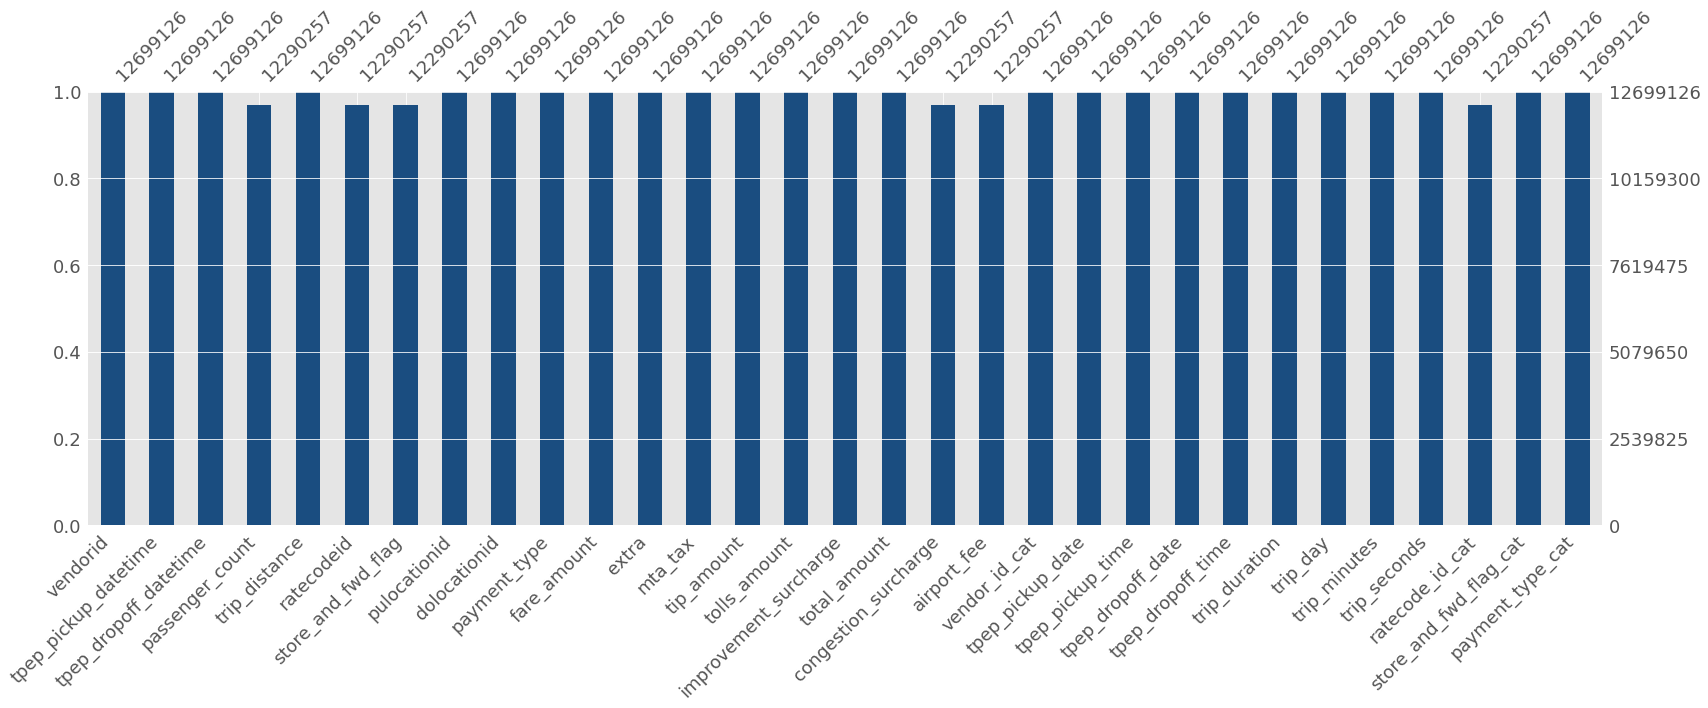

In [40]:
msno.bar(merged_df, fontsize=18, labels=True, color=(0.1, 0.3, 0.5))

# Data Visualization

In [41]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def million(x, pos):
  return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

In [42]:
df = merged_df.loc[merged_df['trip_day'] >= 0]                   # filter days with trip duration greater than or equal to 0
df

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1              1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2              2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3              2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4              2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...          ...                  ...                   ...              ...   
3627877        2  2022-03-31 23:45:00   2022-04-01 00:01:00              NaN   
3627878        2  2022-03-31 23:59:39   2022-04-01 00:06:09              NaN   
3627879        2  2022-03-31 23:50:00   2022-04-01 00:08:00              NaN   
3627880        2  2022-03-31 23:25:56   2022-03-31 23:32:37              NaN   
3627881        2  2022-03-31 23:08:00   2022-03-31 23:17:00              NaN   

         trip_distance ratecodeid store_and_fwd_flag pulocationid  \
0                 3.80        1.0                  N          142   
1                 2.10        1.0                  N          236   
2                 0.97        1.0                  N          166   
3                 1.09        1.0                  N          114   
4                 4.30        1.0                  N           68   
...                ...        ...                ...          ...   
3627877           3.57        NaN               None           48   
3627878           2.04        NaN               None           48   
3627879           0.59        NaN               None           48   
3627880           1.26        NaN               None          158   
3627881           1.66        NaN               None          112   

        dolocationid payment_type  ...  tpep_pickup_time  tpep_dropoff_date  \
0                236            1  ...          00:35:40         2022-01-01   
1                 42            1  ...          00:33:43         2022-01-01   
2                166            1  ...          00:53:21         2022-01-01   
3                 68            2  ...          00:25:21         2022-01-01   
4                163            1  ...          00:36:48         2022-01-01   
...              ...          ...  ...               ...                ...   
3627877          262            0  ...          23:45:00         2022-04-01   
3627878          238            0  ...          23:59:39         2022-04-01   
3627879            4            0  ...          23:50:00         2022-04-01   
3627880           68            0  ...          23:25:56         2022-03-31   
3627881          256            0  ...          23:08:00         2022-03-31   

         tpep_dropoff_time   trip_duration  trip_day  trip_minutes  \
0                 00:53:29 0 days 00:17:49         0         17.82   
1                 00:42:07 0 days 00:08:24         0          8.40   
2                 01:02:19 0 days 00:08:58         0          8.97   
3                 00:35:23 0 days 00:10:02         0         10.03   
4                 01:14:20 0 days 00:37:32         0         37.53   
...                    ...             ...       ...           ...   
3627877           00:01:00 0 days 00:16:00         0         16.00   
3627878           00:06:09 0 days 00:06:30         0          6.50   
3627879           00:08:00 0 days 00:18:00         0         18.00   
3627880           23:32:37 0 days 00:06:41         0          6.68   
3627881           23:17:00 0 days 00:09:00         0          9.00   

         trip_seconds  ratecode_id_cat        store_and_fwd_flag_cat  \
0              1069.0    Standard rate  not a store and forward trip   
1               504.0    Standard rate  not a store and forward trip   
2               538.0    Standard rate  not a store and forward trip   
3               602.0    Standard rate  not a store and forward trip   
4              2252.0    Standard rate  not a store and forward trip

In [43]:
df['trip_duration'].describe()

count                     12692658
mean     0 days 00:15:45.408173449
std      0 days 00:46:38.397969672
min                0 days 00:00:00
25%                0 days 00:06:57
50%                0 days 00:11:18
75%                0 days 00:18:00
max                6 days 01:59:28
Name: trip_duration, dtype: object

# Passenger Count Exploration

In [44]:
df1 = df[
          ['tpep_pickup_date', 'tpep_pickup_time', 'tpep_dropoff_time', 'passenger_count', 'trip_distance']
        ]
df1

tpep_pickup_date tpep_pickup_time tpep_dropoff_time  passenger_count  \
0             2022-01-01         00:35:40          00:53:29              2.0   
1             2022-01-01         00:33:43          00:42:07              1.0   
2             2022-01-01         00:53:21          01:02:19              1.0   
3             2022-01-01         00:25:21          00:35:23              1.0   
4             2022-01-01         00:36:48          01:14:20              1.0   
...                  ...              ...               ...              ...   
3627877       2022-03-31         23:45:00          00:01:00              NaN   
3627878       2022-03-31         23:59:39          00:06:09              NaN   
3627879       2022-03-31         23:50:00          00:08:00              NaN   
3627880       2022-03-31         23:25:56          23:32:37              NaN   
3627881       2022-03-31         23:08:00          23:17:00              NaN   

         trip_distance  
0                 3.80  
1                 2.10  
2                 0.97  
3                 1.09  
4                 4.30  
...                ...  
3627877           3.57  
3627878           2.04  
3627879           0.59  
3627880           1.26  
3627881           1.66  

[12692658 rows x 5 columns]

In [45]:
# parse date
df1['tpep_pickup_date'] = pd.to_datetime(df1['tpep_pickup_date'])
df1['day'] = df1['tpep_pickup_date'].dt.day
df1['month'] = df1['tpep_pickup_date'].dt.month
df1['year'] = df1['tpep_pickup_date'].dt.year

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12692658 entries, 0 to 3627881
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   tpep_pickup_date   datetime64[ns]
 1   tpep_pickup_time   object        
 2   tpep_dropoff_time  object        
 3   passenger_count    float64       
 4   trip_distance      float64       
 5   day                int64         
 6   month              int64         
 7   year               int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 871.5+ MB


In [46]:
df1['passenger_count'].describe()

count    1.229025e+07
mean     1.389839e+00
std      9.776058e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [47]:
df1.groupby('day').agg([np.sum])['passenger_count']                         

sum
day          
1    514902.0
2    517286.0
3    573602.0
4    589309.0
5    603472.0
6    499233.0
7    474170.0
8    560656.0
9    538677.0
10   570500.0
11   606305.0
12   620076.0
13   520587.0
14   535216.0
15   565870.0
16   565470.0
17   546407.0
18   617306.0
19   623064.0
20   533926.0
21   523050.0
22   569329.0
23   578730.0
24   588891.0
25   614899.0
26   665174.0
27   571461.0
28   554846.0
29   365313.0
30   426017.0
31   447726.0

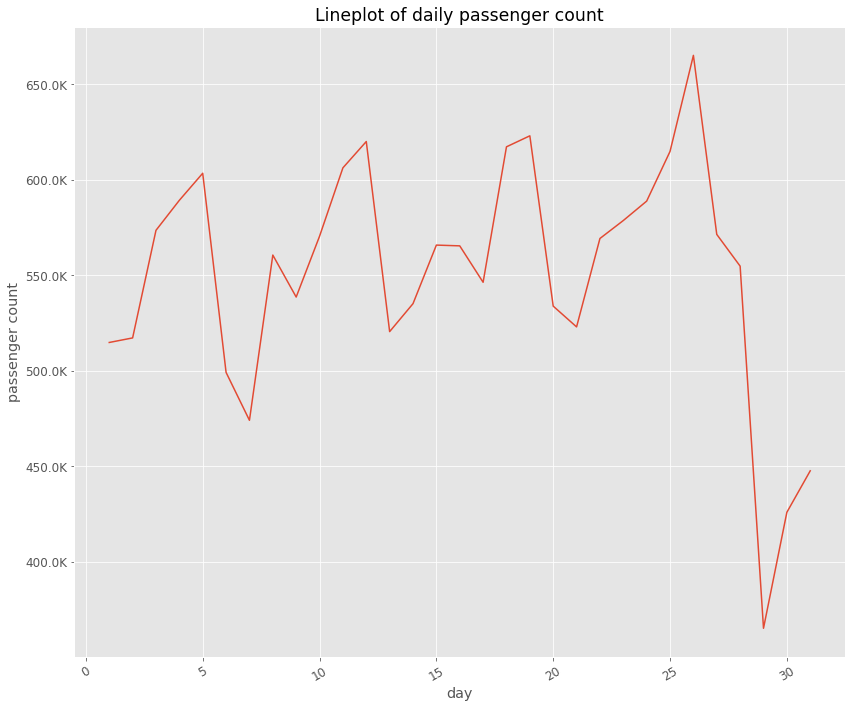

In [48]:
ax = df1.groupby('day')\
        .agg(sum)['passenger_count']\
        .plot(kind='line', rot=30, xlabel='day', ylabel='passenger count', title='Lineplot of daily passenger count')

ax.yaxis.set_major_formatter(format_tsd)

In [49]:
df1.query("month == 1 | month == 2 | month == 3")\
   .groupby('month')\
   .agg(sum)['passenger_count']

month
1    3324112.0
2    4006192.0
3    9750842.0
Name: passenger_count, dtype: float64

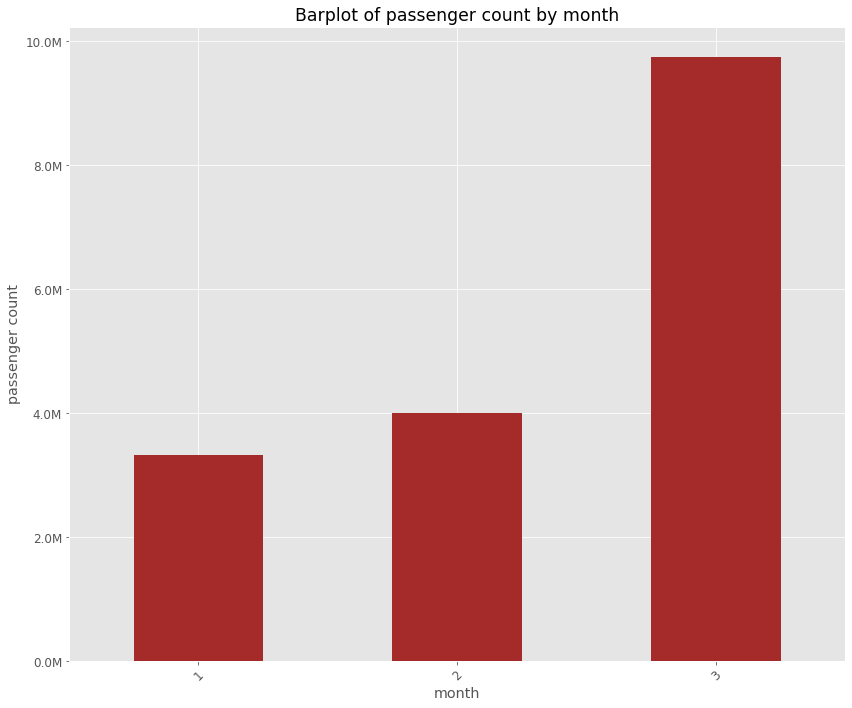

In [50]:
ax = df1.query("month == 1 | month == 2 | month == 3")\
        .groupby('month')\
        .agg(np.sum)['passenger_count']\
        .plot(kind='bar', rot=45, color='brown', xlabel='month', ylabel='passenger count', title='Barplot of passenger count by month')

ax.yaxis.set_major_formatter(format_mill)

# Trip Distance Exploration

In [51]:
df1.groupby('day')\
   .agg([np.max, np.sum])['trip_distance']

amax         sum
day                       
1    118144.57  1736034.63
2    323919.67  2259033.18
3    180535.93  2145236.43
4    141811.31  2906736.61
5    193150.52  2272727.74
6    229371.98  2473211.18
7    211629.10  2186141.79
8    251855.42  2050761.67
9    171065.37  3077107.79
10    82067.21  1993559.58
11   306159.28  3213383.16
12   180846.94  2096445.33
13   143570.38  1678706.42
14   286259.84  3316661.55
15   348798.53  3614788.27
16   137450.80  2378322.38
17   159699.11  2294215.44
18   120846.99  2496413.56
19   267432.23  2703752.18
20   274658.81  2404094.47
21   107248.18  1831701.72
22   117113.86  1821052.45
23   135268.34  1935149.00
24   253093.44  2074412.43
25   114943.43  2252256.22
26   147990.21  2828736.06
27   314364.45  2635500.99
28   116986.08  2062634.56
29   118920.23  1721351.08
30   181534.72  2046081.81
31   250984.47  1932539.31

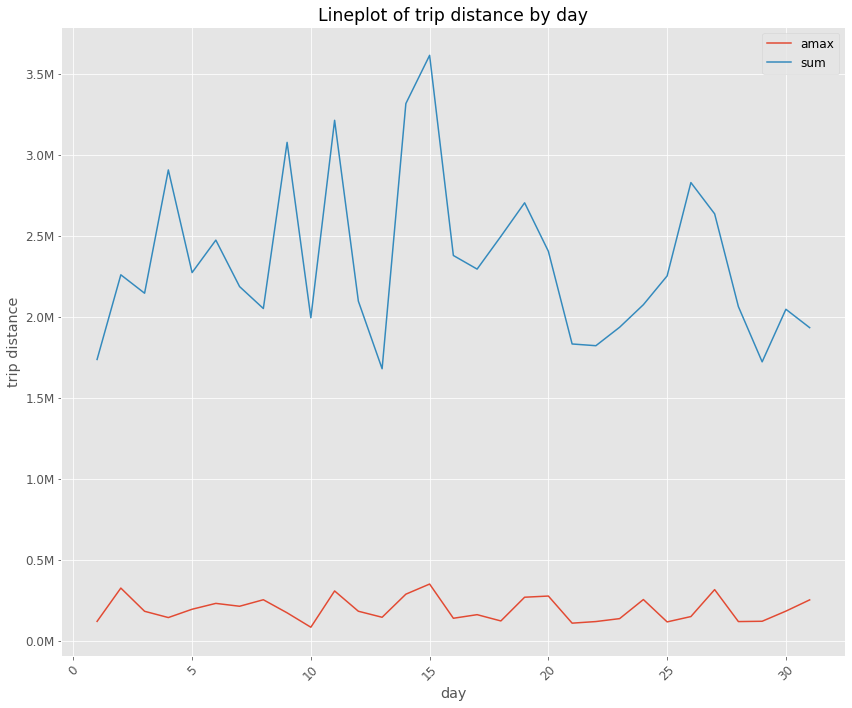

In [52]:
ax1 = df1.groupby('day')\
         .agg([np.max, np.sum])['trip_distance']\
         .plot(kind='line', rot=45, xlabel='day', ylabel='trip distance', title='Lineplot of trip distance by day')

ax1.yaxis.set_major_formatter(format_mill)

In [53]:
df1.query("month == 1 | month == 2 | month == 3")\
   .groupby('month')\
   .agg(np.mean)['trip_distance']

month
1    5.372452
2    5.852266
3    5.761236
Name: trip_distance, dtype: float64

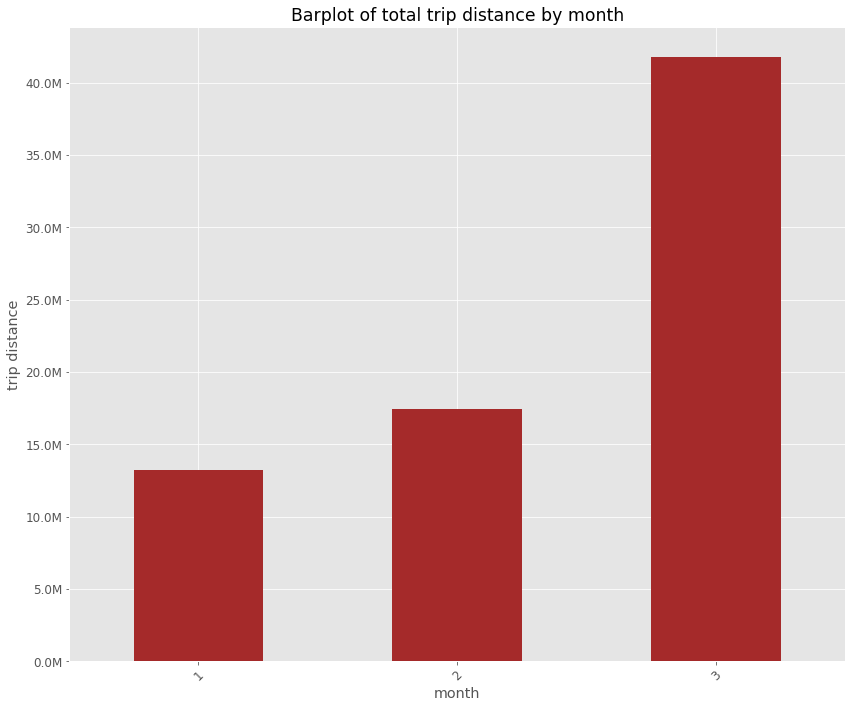

In [54]:
ax1 = df1.query("month == 1 | month == 2 | month == 3")\
         .groupby('month')\
         .agg(np.sum)['trip_distance']\
         .plot(kind='bar', xlabel='month', ylabel='trip distance', title='Barplot of total trip distance by month', rot=45, color='brown')

ax1.yaxis.set_major_formatter(format_mill)